In [1]:
import matplotlib.pyplot as plt
from preprocessing import get_ml_data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
city = 2304400
ini_date = None
end_train_date = None
end_date = None
predict_n = 4
look_back = 4
ratio = 0.75

filename = f'../../data_cluster/dengue_{city}_cluster.csv'

### Capturando os dados: 

In [3]:

X_data, X_train, targets, target = get_ml_data(city, ini_date = ini_date, end_train_date = end_train_date, end_date = end_date, 
                                        ratio = ratio , predict_n = predict_n, look_back = look_back, filename = filename)


In [4]:
X_data

,casos_2307650_lag1,casos_2307650_lag2,casos_2307650_lag3,casos_2307650_lag4,p_rt1_2307650_lag1,p_rt1_2307650_lag2,p_rt1_2307650_lag3,p_rt1_2307650_lag4,p_inc100k_2307650_lag1,p_inc100k_2307650_lag2,...,diff_casos_2311702_lag3,diff_casos_2311702_lag4,diff_casos_2304509_lag1,diff_casos_2304509_lag2,diff_casos_2304509_lag3,diff_casos_2304509_lag4,diff_casos_2303709_lag1,diff_casos_2303709_lag2,diff_casos_2303709_lag3,diff_casos_2303709_lag4
2010-02-07,5.0,4.0,6.0,3.0,0.000000,0.000000,0.000000,0.000000,2.179048,1.743238,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-2.0,1.0,1.0
2010-02-14,3.0,5.0,4.0,6.0,0.269954,0.000000,0.000000,0.000000,1.307429,2.179048,...,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,1.0
2010-02-21,3.0,3.0,5.0,4.0,0.318756,0.269954,0.000000,0.000000,1.307429,1.307429,...,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.0
2010-02-28,7.0,3.0,3.0,5.0,0.850602,0.318756,0.269954,0.000000,3.050667,1.307429,...,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
2010-03-07,10.0,7.0,3.0,3.0,0.936622,0.850602,0.318756,0.269954,4.358096,3.050667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-25,20.0,24.0,14.0,31.0,0.414482,0.435914,0.014407,0.568082,8.716192,10.459431,...,-4.0,5.0,0.0,-1.0,1.0,0.0,2.0,1.0,0.0,-4.0
2023-07-02,13.0,20.0,24.0,14.0,0.100477,0.414482,0.435914,0.014407,5.665525,8.716192,...,1.0,-4.0,0.0,0.0,-1.0,1.0,-2.0,2.0,1.0,0.0
2023-07-09,29.0,13.0,20.0,24.0,0.918983,0.100477,0.414482,0.435914,12.638478,5.665525,...,-1.0,1.0,0.0,0.0,0.0,-1.0,-3.0,-2.0,2.0,1.0
2023-07-16,3.0,29.0,13.0,20.0,0.000143,0.918983,0.100477,0.414482,1.307429,12.638478,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-3.0,-2.0,2.0


In [5]:
X_data.shape

(702, 448)

In [6]:
X_train.shape

(526, 448)

In [7]:
d = 4 # o alvo é o número de casos na semana daqui a 4 semanas
y_train = targets[d][:len(X_train)]

len(y_train)

526

In [8]:
y_data = targets[d]

len(y_data)

698

### Criando um modelo ML simples (random forest):

In [9]:
model = Pipeline([('scaling', StandardScaler()),
#                 ('feature_selection', SelectFromModel(RandomForestRegressor())),
                ('regression', RandomForestRegressor())])

X_prop_train, X_val, y_prop_train, y_val = train_test_split(X_train, y_train,
                                                            test_size=0.25)

model.fit(X_prop_train, y_prop_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('regression', RandomForestRegressor())])

In [10]:
from mapie.regression import MapieRegressor

In [13]:
model_inc = MapieRegressor(
    model, 
    cv=20, test_size=0.25,
    method='plus', agg_function=None, n_jobs=-1,
).fit(X_val, y_val)

In [14]:
pred = model_inc.predict(X_data[:len(targets[d])].values, alpha = 0.05)

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/sklearn/base.py:439: UserWa

In [20]:
len(pred)

2

In [23]:
pred[0].shape

(698,)

In [42]:
pred[1][:,0].reshape(-1)

array([-610.83, -630.22, -258.21, -654.28, -575.99, -565.36, -569.53,
       -638.75, -597.8 , -607.2 , -648.39, -645.45, -626.08, -663.3 ,
       -642.03, -628.87, -680.94, -651.79, -570.51, -627.39, -625.09,
       -649.4 , -630.02, -650.11, -640.13, -666.71, -663.04, -669.57,
       -704.69, -706.83, -713.33, -689.08, -658.92, -717.55, -711.46,
       -676.71, -684.55, -650.11, -694.02, -467.7 , -510.59, -483.3 ,
       -371.14,  -12.7 ,   44.28,   51.99, -172.54, -300.55,  -92.62,
        104.37,   75.55,  672.49,  794.11,  467.23,  814.22, 1537.16,
       1904.66, 1954.95, 1934.81, 1784.72, 1931.73, 1777.87, 1403.81,
        905.57,  496.69,  395.39,  280.37, -193.96,  -88.61, -390.47,
       -493.36, -483.63, -548.35, -537.25, -655.76, -611.46, -542.17,
       -609.62, -676.91, -681.07, -678.98, -692.67, -690.98, -675.26,
       -705.75, -714.73, -726.51, -719.84, -722.93, -676.06, -700.1 ,
       -634.66, -646.35, -676.59, -630.67, -662.72, -642.7 , -642.21,
       -662.58, -613

In [11]:
len(target[d:].index)

698

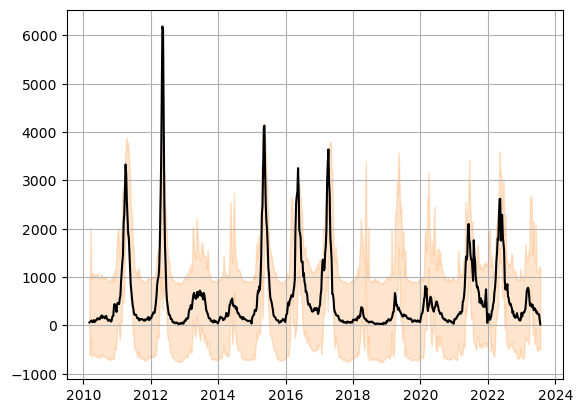

In [44]:
fig, ax = plt.subplots()

ax.plot(target[d:], label = 'Data', color = 'black')

ax.fill_between(target[d:].index, pred[1][:,0].reshape(-1), pred[1][:,1].reshape(-1), label = 'Model', alpha = 0.2, color = 'tab:orange')
ax.grid()

plt.show()